In [22]:
#1. Train, Test and Split
#2. Use L2 regularization for all below
#     a) Initialize Logistic regression with L2 regularization
#     b) Find optimal 'C' with grid search. And find accuracy and train error.
#     c) Test accuracy using Test data with confusion matrix
#     d) Now check the error or sparsity with increasing/decreasing value of 'C'
#3. Repeat second step for L1 regularization
#4. Check feature importance and collinearity(This is independent of the above and can be 
#done any time)

In [33]:
import scipy.sparse
from sklearn.preprocessing import StandardScaler
import warnings
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import scikitplot.metrics
 
    
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
import sqlite3
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
conn=sqlite3.connect(r'''C:\Users\akash\ML\AMAZON/newData.sqlite''')
data=pd.read_sql_query("SELECT * FROM Reviews",conn)

sortedData=data.sort_values(by=["Time"],axis=0)

Data=sortedData.head(100000)

D=Data.iloc[:,[11,7,9]]
label=Data.iloc[:,7]

train,test,labelsTrain,labelsTest=train_test_split(D,label,test_size=0.3)

xTrain=train["cleanedText"]
xTest=test["cleanedText"]


model0=CountVectorizer(ngram_range=(1,4),min_df=50)
model0.fit(xTrain)
sparseBOWTrain=model0.transform(xTrain)
sparseBOWTest=model0.transform(xTest)
featuresBOW=model0.get_feature_names()

In [35]:
lstTrain=[]
for col in labelsTrain.values:
    if(col=="positive"):
        lstTrain.append(1)
    else:
        lstTrain.append(0)
print(len(lstTrain))


lsttest=[]
for col in labelsTest.values:
    if(col=="positive"):
        lsttest.append(1)
    else:
        lsttest.append(0)
print(len(lsttest))

#calculating length of every review
lenxTrain=[]
for value in xTrain.values:
    lenxTrain.append(len(value))
lenxTest=[]
for value in xTest.values:
    lenxTest.append(len(value))
    
#taking summary data
sumTrain=train["Summary"]
sumTest=test["Summary"]

model=CountVectorizer(ngram_range=(1,3),min_df=30)
model.fit(sumTrain)
sparseBOWTrainSUMM=model.transform(sumTrain)
sparseBOWTestSUMM=model.transform(sumTest)
featuresBOWSUMM=model.get_feature_names()
#concatenating both of the sparse matrix
mergedTrain=hstack((sparseBOWTrain, sparseBOWTrainSUMM))
mergedTest=hstack((sparseBOWTest,sparseBOWTestSUMM))

#concat. length as well
X_train_dtm = hstack((mergedTrain,np.array(lenxTrain)[:,None]))
X_test_dtm=hstack((mergedTest,np.array(lenxTest)[:,None]))

result=featuresBOW + featuresBOWSUMM
le=["reviewLENGTH"]
result+=le
print(len(result))

70000
30000
8677


## Standardizing the data

In [36]:
std=StandardScaler(with_mean=False)
std.fit(X_train_dtm)
X_train_dtm=std.transform(X_train_dtm)
X_test_dtm=std.transform(X_test_dtm)

In [5]:
lmda=[0.0001,0.001,0.01,0.1,1,10,100,1000]
param_grid=dict(C=lmda)

# L2 REGULARIZATION

## using f1Score

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
1.0


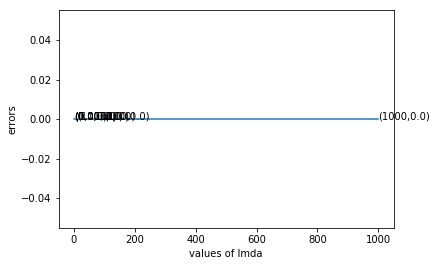

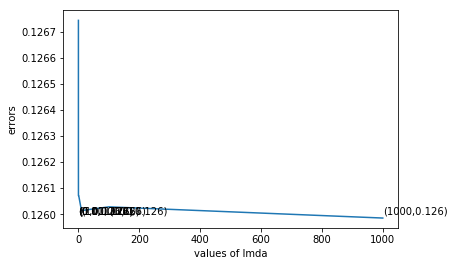

In [28]:
#using gridsearch using f1Score
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="f1_micro")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_train_dtm,lstTrain))

df=pd.DataFrame(grid.cv_results_)

trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#plotting training error
#using f1score
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#plotting cv error
#using f1score
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### using precision

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.8830333333333333


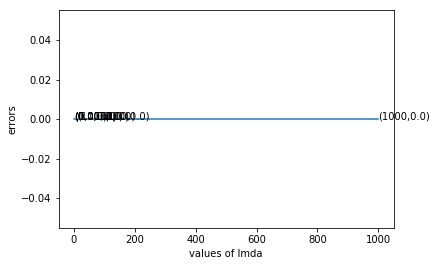

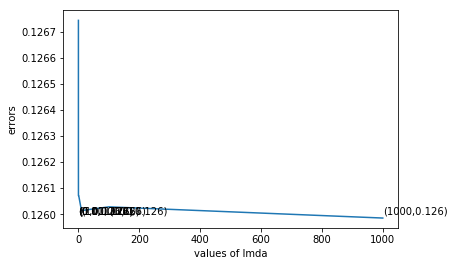

In [29]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="precision_micro")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
#using precision
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
#using precision
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## Using roc_auc

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.7727227987712669


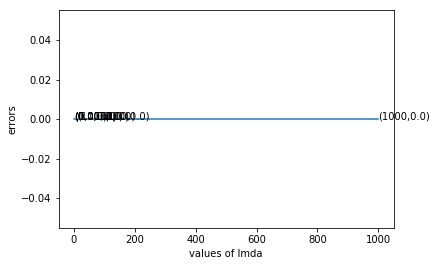

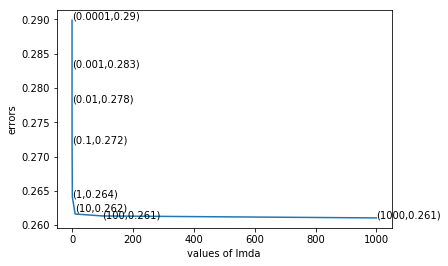

In [30]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="roc_auc")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
#using precision
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
#using precision
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## ROC AUC curve

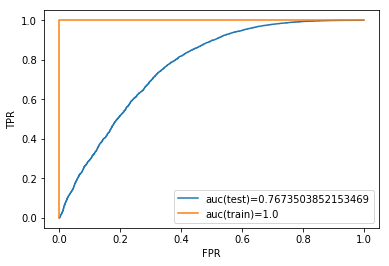

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(C=100)
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### confusion matrix for training data

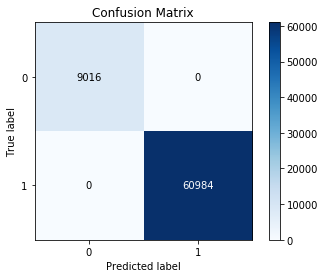

In [31]:
model=LogisticRegression(C=100)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_train_dtm)
scikitplot.metrics.plot_confusion_matrix(lstTrain,pred)

### confusion matrix for test data

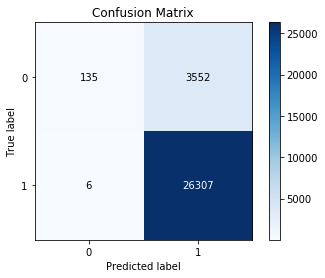

In [32]:
model=LogisticRegression(C=0.001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
scikitplot.metrics.plot_confusion_matrix(lsttest,pred)

## using randomized search

### using f1score

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.8830333333333333


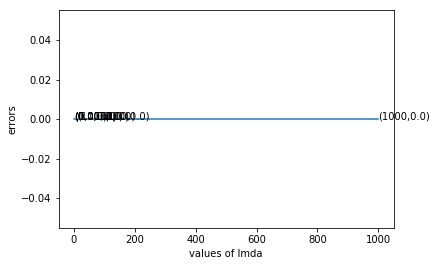

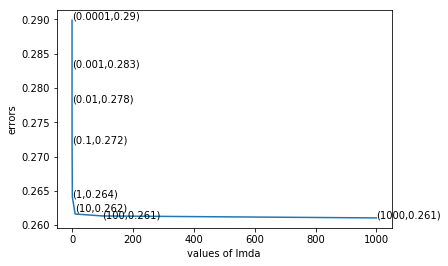

In [33]:
rand=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="f1_micro",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using precision

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.8830333333333333


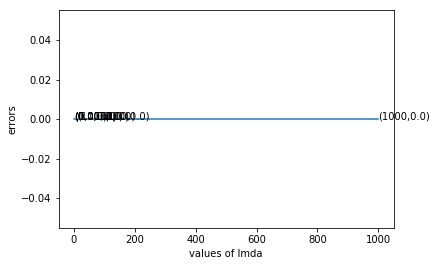

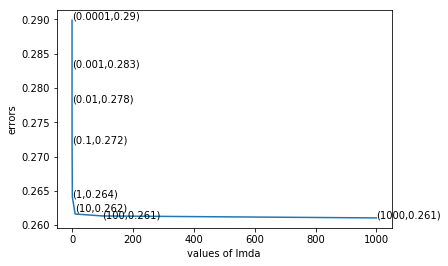

In [34]:
rand=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="precision_micro",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.7727227987712669


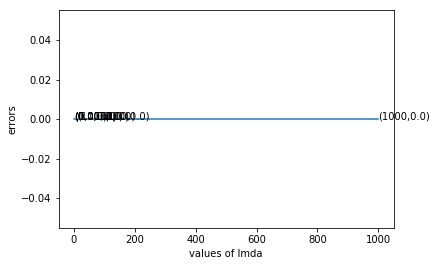

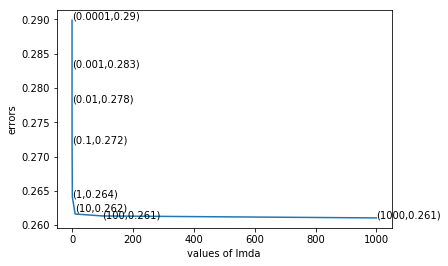

In [35]:
rand=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="roc_auc",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

# using L1 regularization

### using gridsearch f1 score

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.9995571428571428


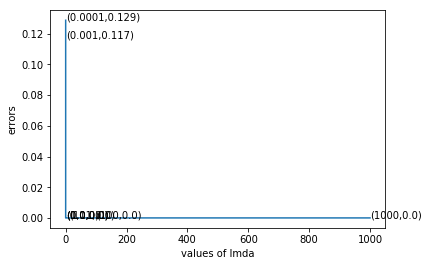

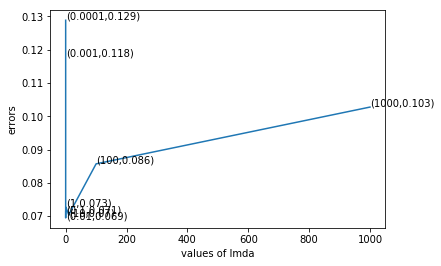

In [36]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_train_dtm,lstTrain))

df=pd.DataFrame(grid.cv_results_)

trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

## plotting training eror
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

##plotting cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### using gridsearch precision score

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
1.0


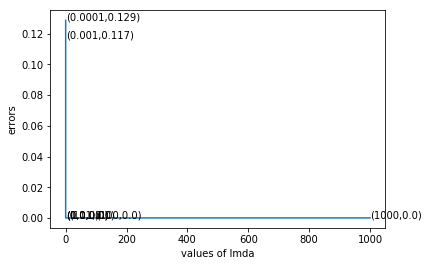

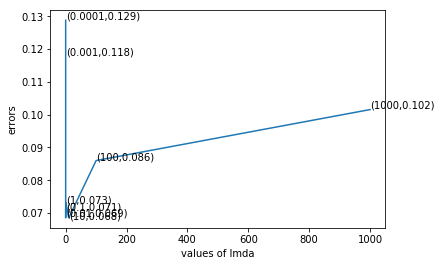

In [37]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_train_dtm,lstTrain))

df=pd.DataFrame(grid.cv_results_)

trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

## plotting training eror
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

##plotting cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

the best estimator for gridsearch using f1 score as metrics : 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.9997545048981386


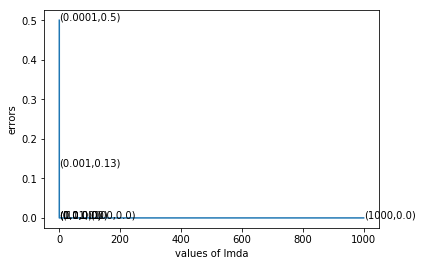

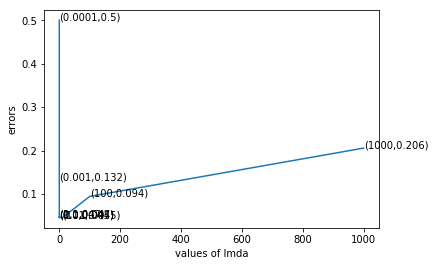

In [38]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc")
grid.fit(X_train_dtm,lstTrain)
print("the best estimator for gridsearch using f1 score as metrics : ")
print(grid.best_estimator_)
print("score is : ")
print(grid.score(X_train_dtm,lstTrain))

df=pd.DataFrame(grid.cv_results_)

trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

## plotting training eror
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

##plotting cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

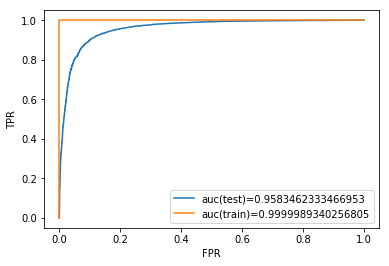

In [9]:
clf=LogisticRegression(C=0.01,penalty="l1")
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# using randomized search

## using f1 score

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.9401


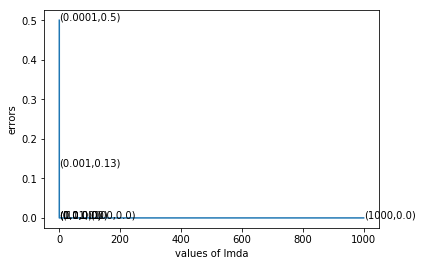

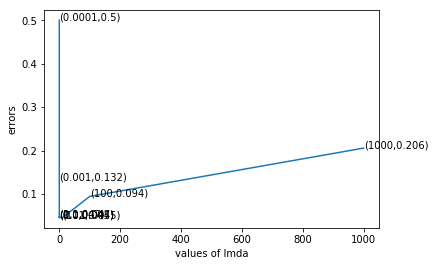

In [39]:
rand=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using precision

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.9401


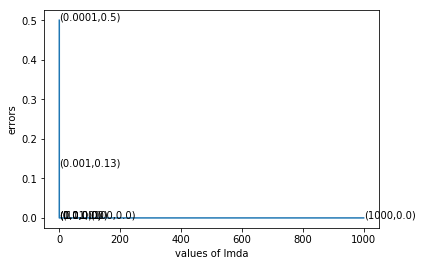

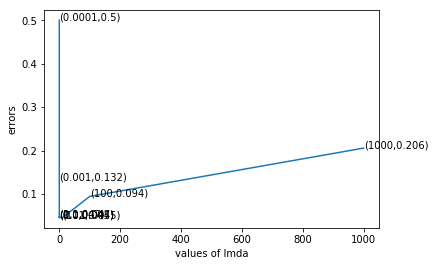

In [40]:
rand=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

the best estimator for randomsearch using f1 score as metrics : 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score is : 
0.9594079611440711


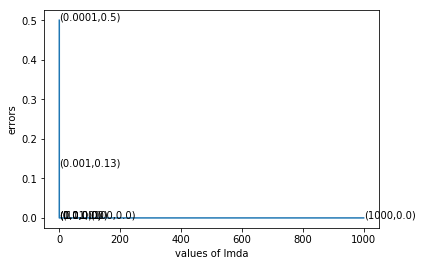

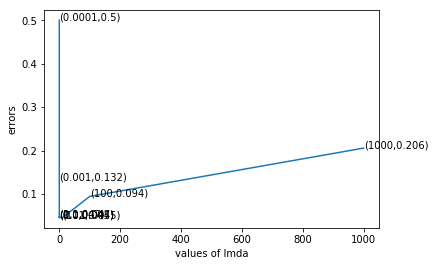

In [41]:
rand=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc",n_iter=8)
rand.fit(X_train_dtm,lstTrain)
print("the best estimator for randomsearch using f1 score as metrics : ")
print(rand.best_estimator_)
print("score is : ")
print(rand.score(X_test_dtm,lsttest))

df=pd.DataFrame(grid.cv_results_)
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

#ERROR
MSEf1train=[1-x for x in trainScore]
MSEf1cv=[1-x for x in cvScore]

#training error
plt.plot(lmda,MSEf1train)
for xy in zip(lmda,np.round(MSEf1train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

#cv error
plt.plot(lmda,MSEf1cv)
for xy in zip(lmda,np.round(MSEf1cv,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## confusion metrics for training data

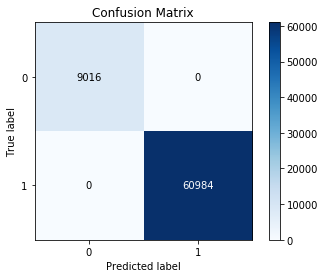

In [42]:
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_train_dtm)
scikitplot.metrics.plot_confusion_matrix(lstTrain,pred)

## confusion metrics for test data

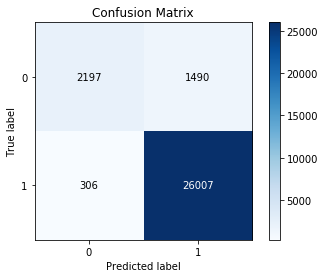

In [43]:
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
scikitplot.metrics.plot_confusion_matrix(lsttest,pred)

# CHECKING THE SPARSITY BY INCREASING LMBDA VALUES

In [44]:
print("FOR C=1000")
model=LogisticRegression(penalty="l1",C=1000)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=100")
model=LogisticRegression(penalty="l1",C=100)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=10")
model=LogisticRegression(penalty="l1",C=10)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=1")
model=LogisticRegression(penalty="l1",C=1)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=0.1")
model=LogisticRegression(penalty="l1",C=0.1)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=0.01")
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=0.001")
model=LogisticRegression(penalty="l1",C=0.001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))
print("="*50)
print("FOR C=0.0001")
model=LogisticRegression(penalty="l1",C=0.0001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

FOR C=1000
accuracy is 0.85
f1score is 0.92
no. of nonzero ele are 680821
FOR C=100
accuracy is 0.91
f1score is 0.95
no. of nonzero ele are 313769
FOR C=10
accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 93692
FOR C=1
accuracy is 0.93
f1score is 0.96
no. of nonzero ele are 136193
FOR C=0.1
accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 257429
FOR C=0.01
accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 161733
FOR C=0.001
accuracy is 0.9
f1score is 0.95
no. of nonzero ele are 88
FOR C=0.0001
accuracy is 0.88
f1score is 0.93
no. of nonzero ele are 0


## pertubation test

for the pertubation test we need to add small noise to the non zero elemets of the matrix(therefore we need to find them with the help of "find")

In [150]:
#preparing model
model=LogisticRegression(penalty="l2",C=100)
model.fit(X_train_dtm,lstTrain)

#before addition of epsilon
coeff1=model.coef_

indices=X_train_dtm.indices
indptr=X_train_dtm.indptr

#number of non zero elements
nonZ=X_train_dtm.count_nonzero()

#noise
noise=np.random.uniform(low=0,high=0.0001)
#total noise needed
noiseD=[noise]*nonZ

from scipy.sparse import csr_matrix
noisyMat=csr_matrix((noiseD,indices,indptr),shape=X_train_dtm.shape)

#matrix with noise added to it
mat=X_train_dtm + noisyMat

#training with noise
modelN=LogisticRegression(penalty="l2",C=100)
modelN.fit(mat,lstTrain)

#coeff after adding noise
coeff2=modelN.coef_

#diff between the coefficients
diff=coeff1-coeff2

#sorted
sorted=np.sort(diff)[:,::-1]
#showing top 10
sorted[0,0:10]

array([0.15958372, 0.13706976, 0.13648083, 0.12314904, 0.11012486,
       0.10743384, 0.09926943, 0.09862162, 0.09818013, 0.09066347])

### result of pertubation test

clearly there is not  much difference between the coefficients(before adding noise and after adding it)

## IMPORTANT FEATURES

In [46]:
clf=LogisticRegression(C=0.01)
clf.fit(X_train_dtm,lstTrain)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
positive=[]
negative=[]
def show_most_informative_features(result, clf, n=20):
    feature_names = result
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        negative.append(fn_1)
        positive .append(fn_2)
show_most_informative_features(result,clf)        

## positive features

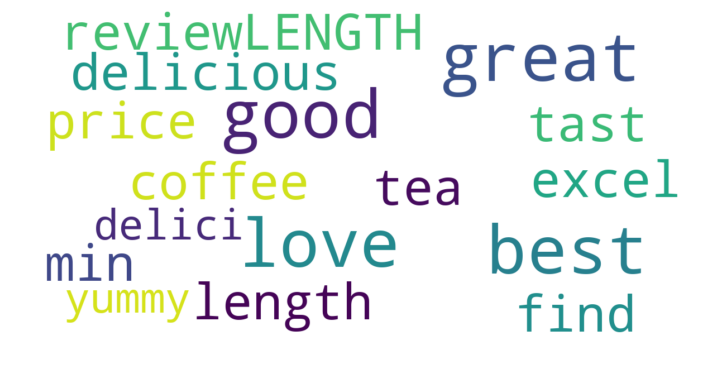

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud2 = WordCloud( background_color='white',
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(positive))
# Display the generated image:
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## negative features

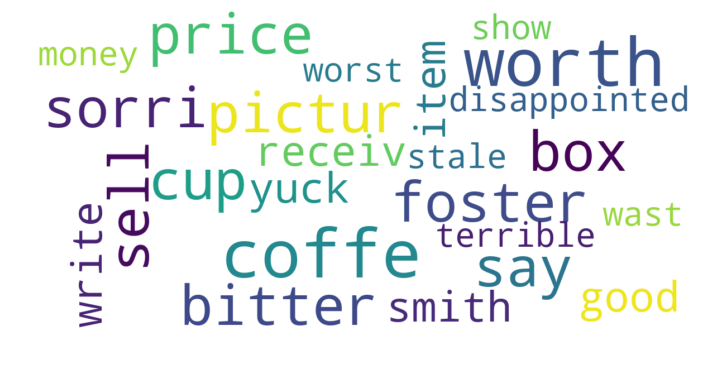

In [49]:
wordcloud2 = WordCloud( background_color='white',
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(negative))
# Display the generated image:
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# TFIDF

In [50]:
model=TfidfVectorizer(ngram_range=(1,4),min_df=10)
model.fit(xTrain)
sparseTFIDFTrain=model.transform(xTrain)
sparseTFIDFTest=model.transform(xTest)

#getting features
features=model.get_feature_names()
print("total no. of features are")
print(len(features))


#taking the summary data as well as the length of the reviews into consideration
model=TfidfVectorizer(ngram_range=(1,2),min_df=10)
model.fit(sumTrain)
sparseTFIDFTrainSUMM=model.transform(sumTrain)
sparseTFIDFTestSUMM=model.transform(sumTest)

#features of summary data
featuresSummary=model.get_feature_names()
print("total no of features from summary data are")
print(len(featuresSummary))

#concatenating both of the matrices(text and summary)
mergedTrain=hstack((sparseTFIDFTrain,sparseTFIDFTrainSUMM))
mergedTest=hstack((sparseTFIDFTest,sparseTFIDFTestSUMM))

#concatenating the length of the reviews
X_train_dtm=hstack((mergedTrain,np.array(lenxTrain)[:,None]))
X_test_dtm=hstack((mergedTest,np.array(lenxTest)[:,None]))

#standardizing the data
std=StandardScaler(with_mean=False)
std.fit(X_train_dtm)
X_train_dtm=std.transform(X_train_dtm)
X_test_dtm=std.transform(X_test_dtm)

total no. of features are
42301
total no of features from summary data are
4713


In [51]:
result=features + featuresSummary
le=["reviewLENGTH"]
result+=le
print(len(result))

47015


## L2 REGULARIZATION

## GRIDSEARCHCV

## using f1 score

best estimator is :
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9999571428571429


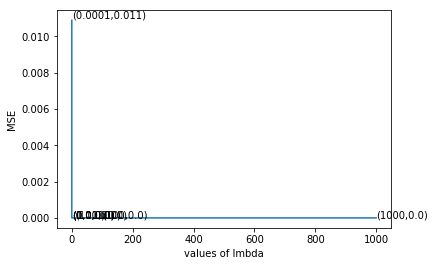

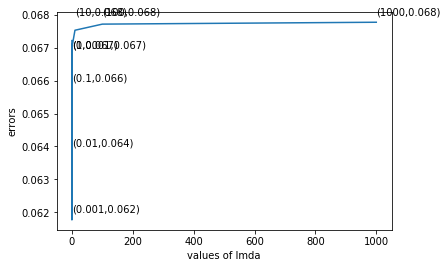

In [52]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="f1_micro")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### using precision

best estimator is :
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9999571428571429


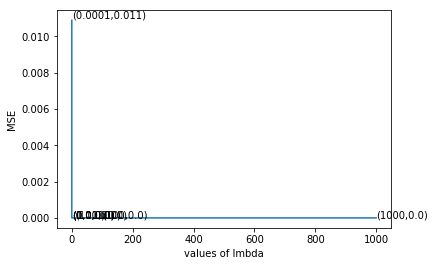

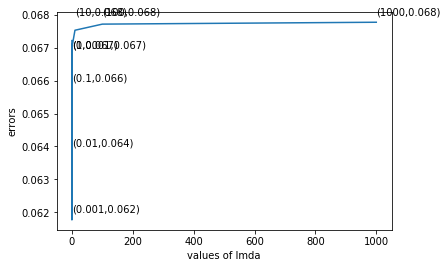

In [53]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="precision_micro")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best score is :
0.9994086609157292


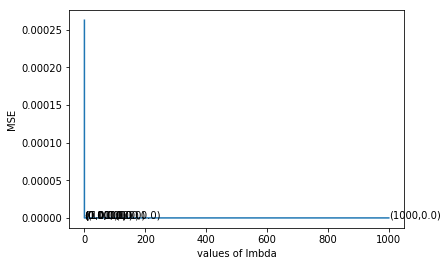

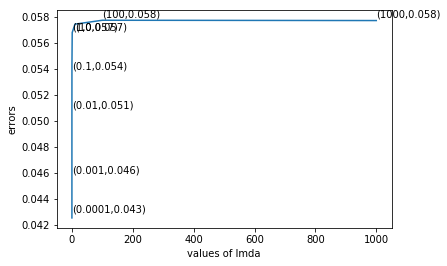

In [54]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="roc_auc")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

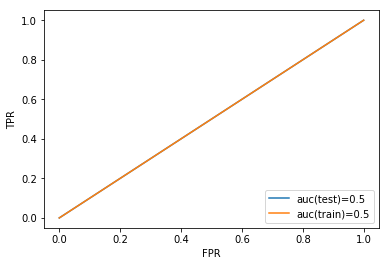

In [10]:
clf=LogisticRegression(C=0.0001,penalty="l1")
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# using Randomized Search

### f1score

best estimator is :
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9999571428571429


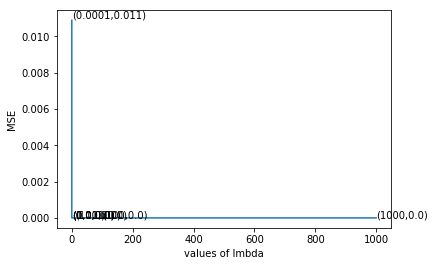

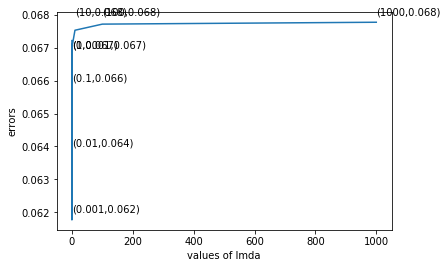

In [55]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()


#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### precision

best estimator is :
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9999571428571429


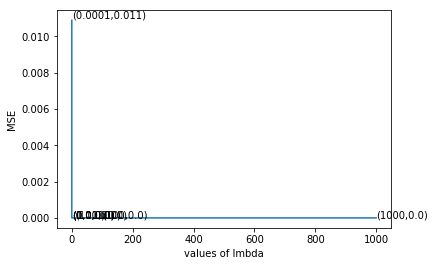

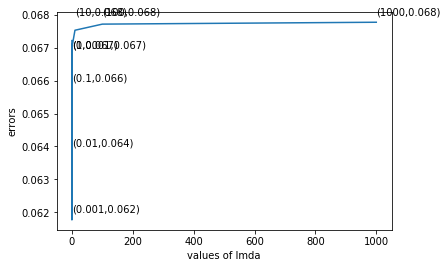

In [56]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best score is :
0.9994086609157292


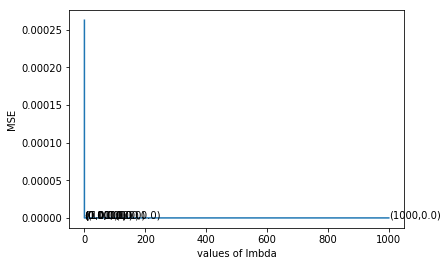

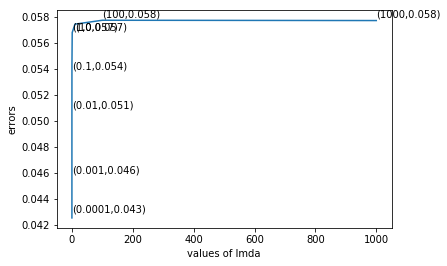

In [57]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

# L1 Regularization

## GridSearchCV

best estimator is :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9646142857142858


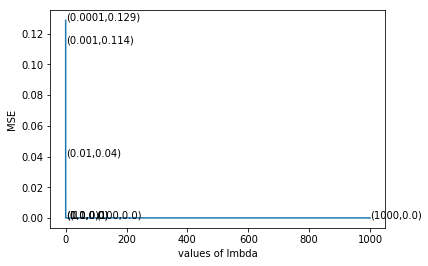

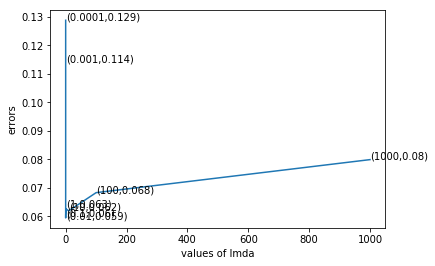

In [58]:
#using f1 score
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9646142857142858


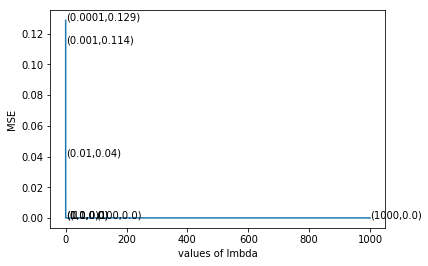

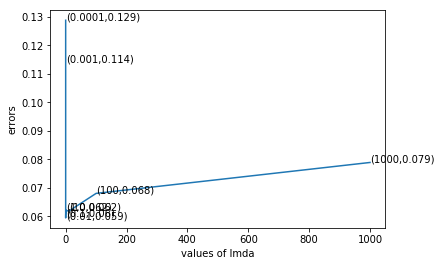

In [59]:
#using precision
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9893201200838633


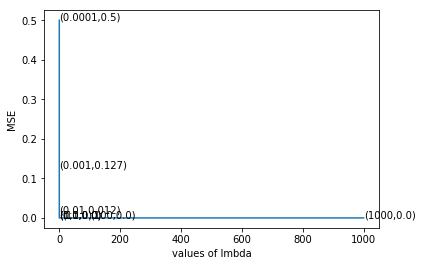

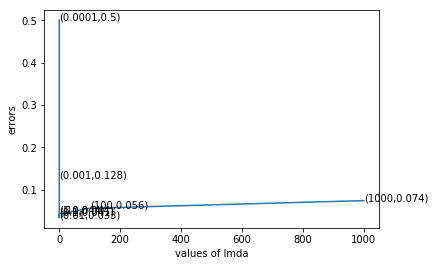

In [60]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc")
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

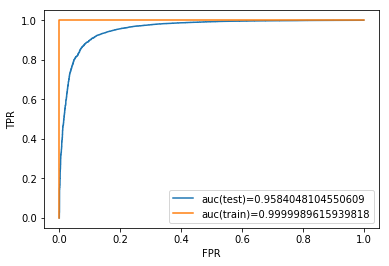

In [11]:
clf=LogisticRegression(C=0.01,penalty="l1")
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Using randomized search

best estimator is :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9645857142857143


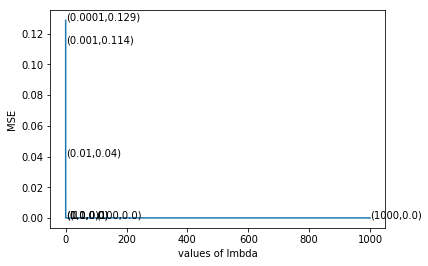

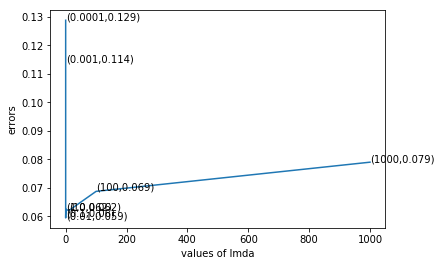

In [61]:
#using f1 score
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.9999571428571429


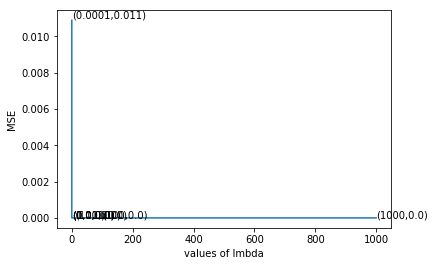

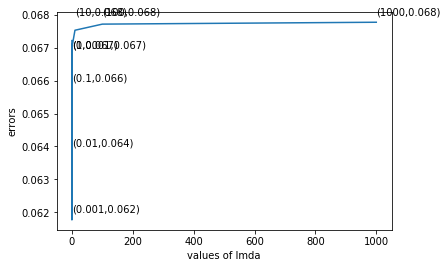

In [62]:
#using precision
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best score is :
0.9994086609157292


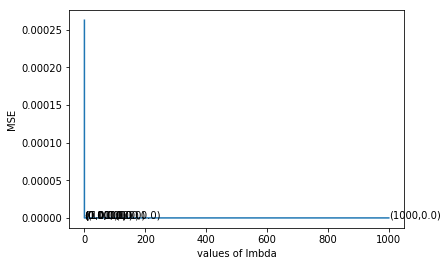

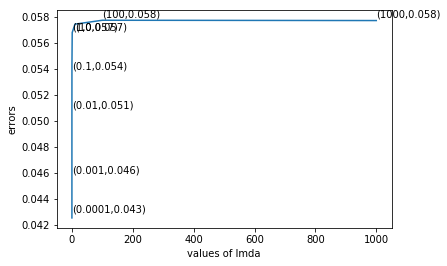

In [63]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

# confusion metrics

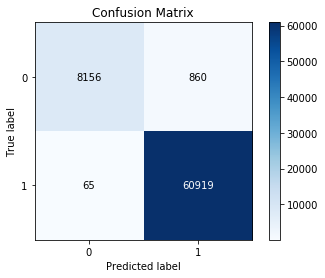

In [64]:
#training data
model=LogisticRegression(C=0.0001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_train_dtm)
scikitplot.metrics.plot_confusion_matrix(lstTrain,pred)

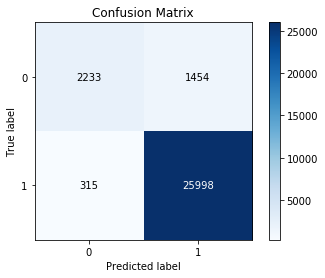

In [65]:
#test data
model=LogisticRegression(C=0.0001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
scikitplot.metrics.plot_confusion_matrix(lsttest,pred)

observtion:
67% of the points which are actually negative are predicted to be negative

# CHECKING THE SPARSITY BY INCREASING LMBDA VALUES

In [66]:
model=LogisticRegression(penalty="l1",C=0.0001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.88
f1score is 0.93
no. of nonzero ele are 0


In [67]:
model=LogisticRegression(penalty="l1",C=0.001)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.9
f1score is 0.95
no. of nonzero ele are 99


In [68]:
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.95
f1score is 0.97
no. of nonzero ele are 3242


In [69]:
model=LogisticRegression(penalty="l1",C=0.1)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 10358


In [70]:
model=LogisticRegression(penalty="l1",C=1)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 12612


In [71]:
model=LogisticRegression(penalty="l1",C=10)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.94
f1score is 0.97
no. of nonzero ele are 17913


In [72]:
model=LogisticRegression(penalty="l1",C=100)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.93
f1score is 0.96
no. of nonzero ele are 35898


In [73]:
model=LogisticRegression(penalty="l1",C=1000)
model.fit(X_train_dtm,lstTrain)
pred=model.predict(X_test_dtm)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.93
f1score is 0.96
no. of nonzero ele are 45657


## IMPORTANT FEATURES

In [74]:
clf=LogisticRegression(C=0.0001)
clf.fit(X_train_dtm,lstTrain)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [75]:
positive=[]
negative=[]
def show_most_informative_features(result, clf, n=20):
    feature_names = result
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        negative.append(fn_1)
        positive .append(fn_2)
show_most_informative_features(result,clf)  

## Positive features

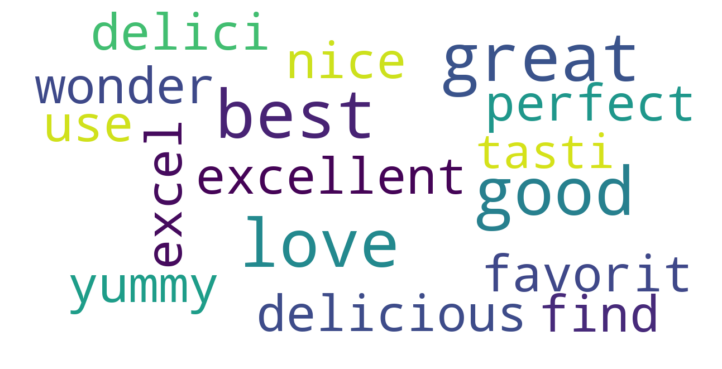

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud2 = WordCloud( background_color='white',
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(positive))
# Display the generated image:
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


## negative features

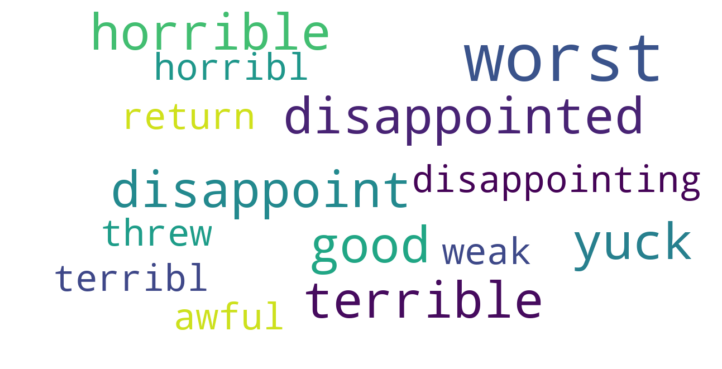

In [77]:
wordcloud2 = WordCloud( background_color='white',
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(negative))
# Display the generated image:
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# WORD 2 VECTOR

In [78]:
lst=[]
for x in xTrain:
    lst.append(x.split())
test=[]
for x in xTest:
    test.append(x.split())

In [79]:
from gensim.models import Word2Vec
modelW2V=Word2Vec(lst,min_count=5,size=50)
words=list(modelW2V.wv.vocab)

## for training data

In [80]:
sentVec=[]
for y in lst:
    sVec=np.zeros(50)
    count=0
    for word in y:
        if word in words:
            vec=modelW2V[word]
            sVec+=vec
            count+=1
    if count!=0:
        sentVec.append(sVec/count)
        

In [81]:
len(sentVec)

70000

## for test data

In [82]:
sentVecTest=[]
for y in test:
    sVec=np.zeros(50)
    count=0
    for word in y:
        if word in words:
            vec=modelW2V[word]
            sVec+=vec
            count+=1
    if count!=0:
        sentVecTest.append(vec/count)

## standardizing the data

In [83]:
std=StandardScaler(with_mean=False)
std.fit(sentVec)
sentVec=std.transform(sentVec)
sentVecTest=std.transform(sentVecTest)

## L2 REGULARIZATION

### GridSearchCV f1Score

best estimator is :
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8982285714285714


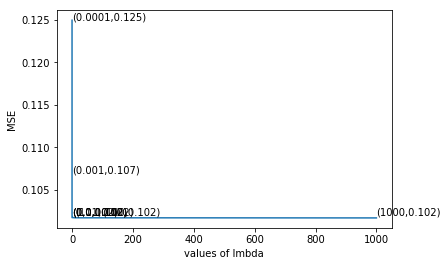

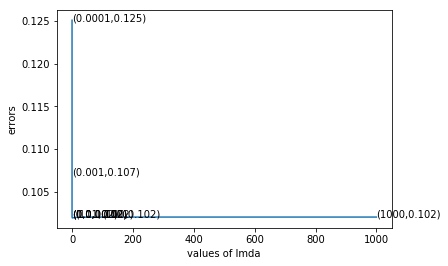

In [84]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="f1_micro")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### using precision

best estimator is :
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8982285714285714


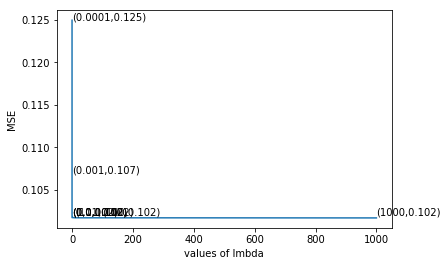

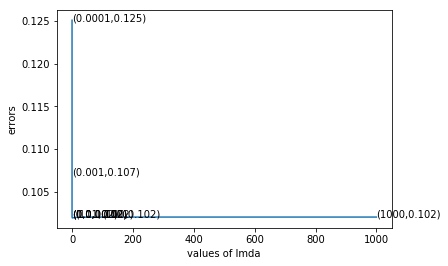

In [85]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="precision_micro")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8915691361028439


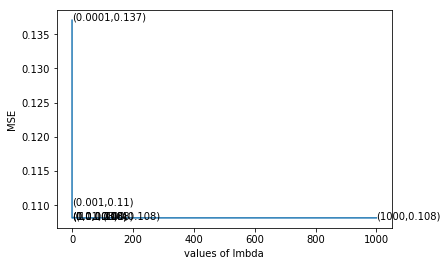

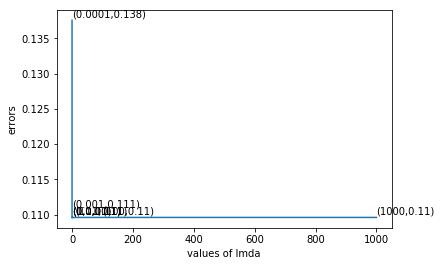

In [86]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="roc_auc")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

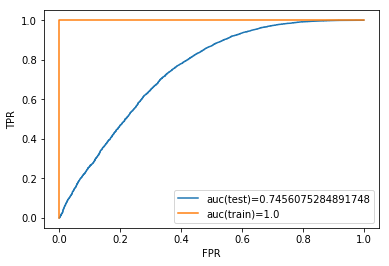

In [12]:
clf=LogisticRegression(C=0.01)
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## using RANDOMIZEDSEARCH

best estimator is :
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8982285714285714


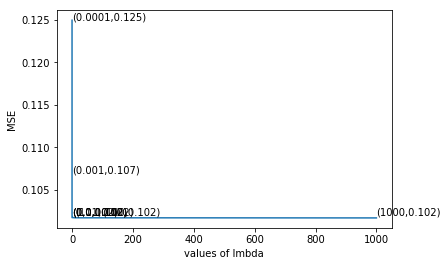

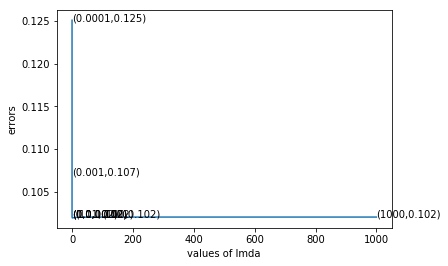

In [87]:
#using f1 score
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8982285714285714


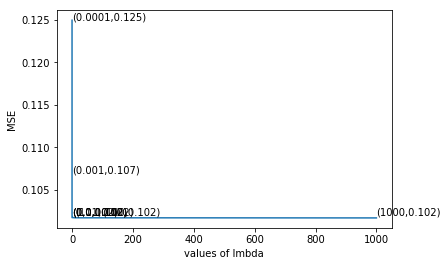

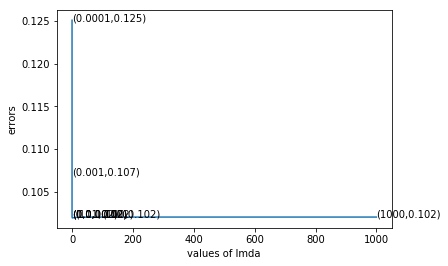

In [88]:
#using precision
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best score is :
0.9994086609157292


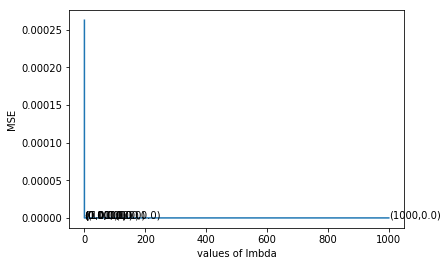

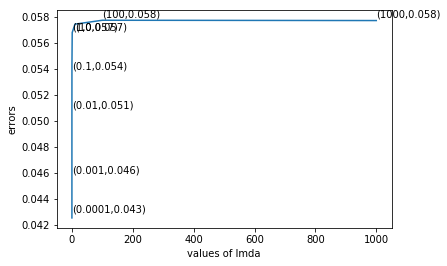

In [89]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(X_train_dtm,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(X_train_dtm,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using L1 REGULARIZATION

## using f1 score

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8981428571428571


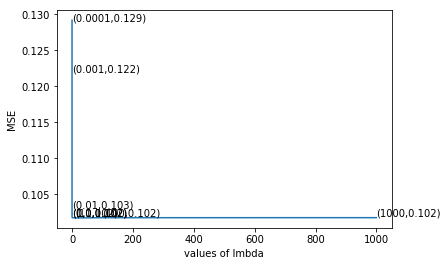

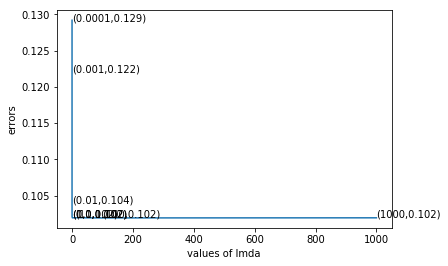

In [90]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

### using precision

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8981428571428571


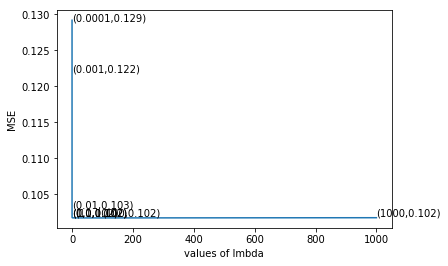

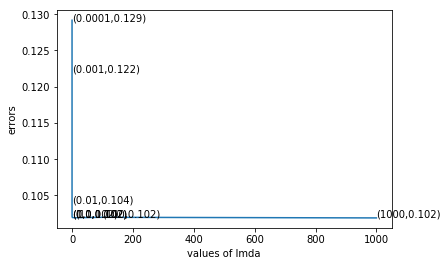

In [91]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8915430081097682


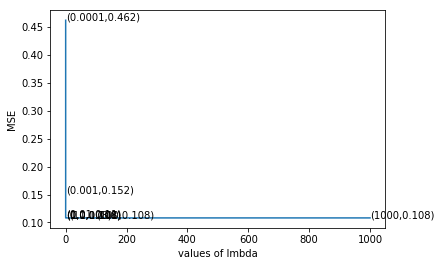

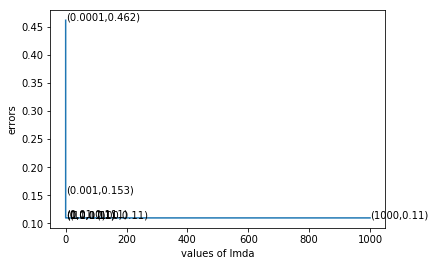

In [92]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc")
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

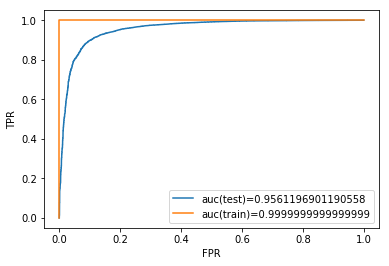

In [13]:
clf=LogisticRegression(C=0.1,penalty="l1")
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### using Randomized search

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8981285714285714


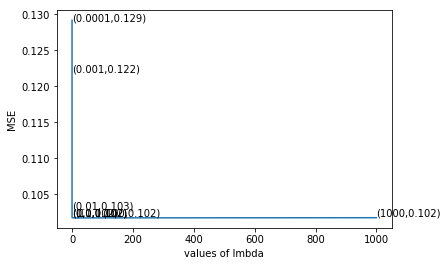

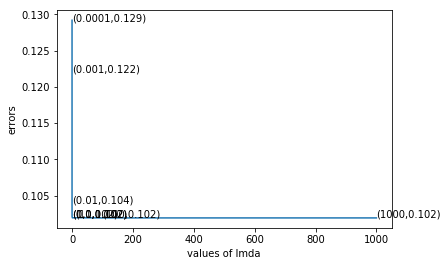

In [93]:
#using f1 score
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8981285714285714


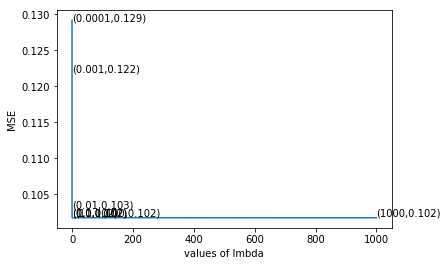

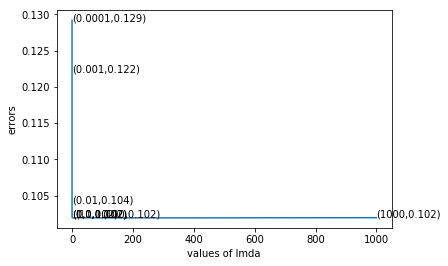

In [94]:
#using precision
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8915422096836955


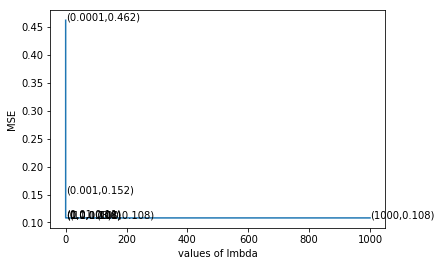

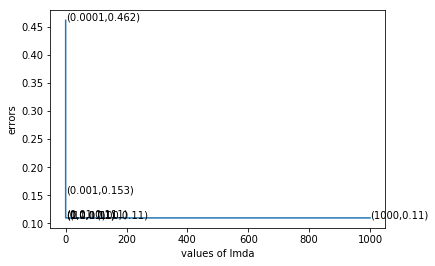

In [95]:
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(sentVec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sentVec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## confusion metrics for training data

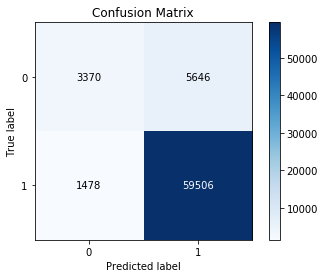

In [96]:
#training data
model=LogisticRegression(C=1)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVec)
scikitplot.metrics.plot_confusion_matrix(lstTrain,pred)

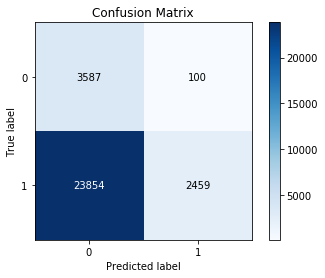

In [97]:
#test data
model=LogisticRegression(C=1)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
scikitplot.metrics.plot_confusion_matrix(lsttest,pred)

# checking sparsity by varying values of C

In [98]:
model=LogisticRegression(penalty="l1",C=0.0001)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.78
f1score is 0.88
no. of nonzero ele are 4


In [99]:
model=LogisticRegression(penalty="l1",C=0.001)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.71
f1score is 0.82
no. of nonzero ele are 22


In [100]:
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.67
f1score is 0.79
no. of nonzero ele are 45


In [101]:
model=LogisticRegression(penalty="l1",C=0.1)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.67
f1score is 0.79
no. of nonzero ele are 50


In [102]:
model=LogisticRegression(penalty="l1",C=1)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.22
f1score is 0.21
no. of nonzero ele are 50


In [103]:
model=LogisticRegression(penalty="l1",C=10)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.21
f1score is 0.19
no. of nonzero ele are 50


In [104]:
model=LogisticRegression(penalty="l1",C=100)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.21
f1score is 0.19
no. of nonzero ele are 50


In [105]:
model=LogisticRegression(penalty="l1",C=1000)
model.fit(sentVec,lstTrain)
pred=model.predict(sentVecTest)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.19
f1score is 0.15
no. of nonzero ele are 50


# TFIDF weighted word2vec

In [106]:
model=TfidfVectorizer(ngram_range=(1,4))
model.fit(xTrain)
trainTFIDF=model.transform(xTrain)
testTFIDF=model.transform(xTest)

features=model.get_feature_names()
#tf=X_train_dtm.tocsr()

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
sent_vec=[]
row=0
for x in tqdm(lst):
    sVec=np.zeros(50)
    weight=0
    for word in x:
        if word in words:
            vec=modelW2V.wv[word]
            tfidf=dictionary[word]*(x.count(word)/len(x))
            sVec+=(vec*tfidf)
            weight+=tfidf
    if(weight!=0):
        sent_vec.append(sVec/weight)
    row+=1

#test data
sent_vec_test=[]
for x in tqdm(test):
    sVec=np.zeros(50)
    weight=0
    for word in x:
        if word in words:
            vec=modelW2V.wv[word]
            tfidf=dictionary[word]*(x.count(word)/len(x))
            sVec+=(vec*tfidf)
            weight+=tfidf
    if(weight!=0):
        sent_vec_test.append(sVec/weight)
        
#standardizing the data
std=StandardScaler(with_mean=False)
std.fit(sent_vec)
sentVec=std.transform(sent_vec)
sentVecTest=std.transform(sent_vec_test)

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:46<00:00, 638.69it/s]


# L2 Regularization 

## gridsearch cv

### f1score

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891571428571429


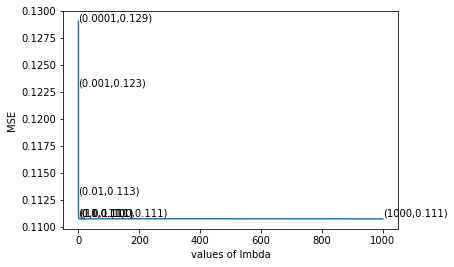

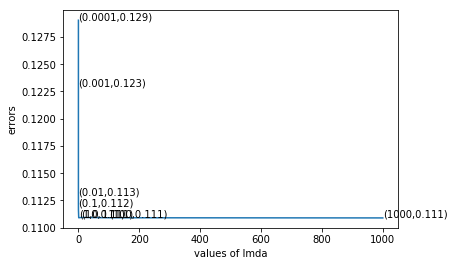

In [107]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="f1_micro")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891571428571429


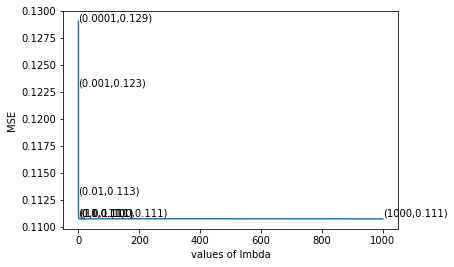

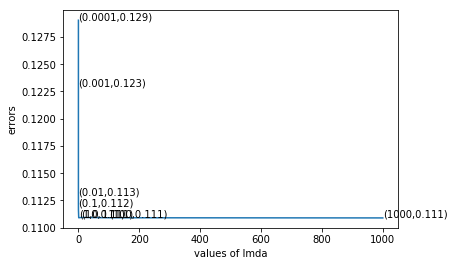

In [108]:
#using precision
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="precision_micro")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8647329190946094


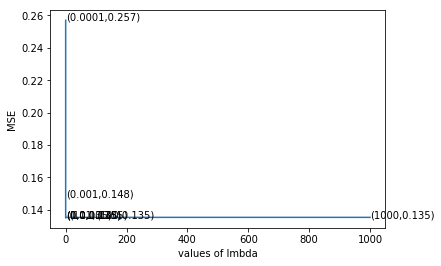

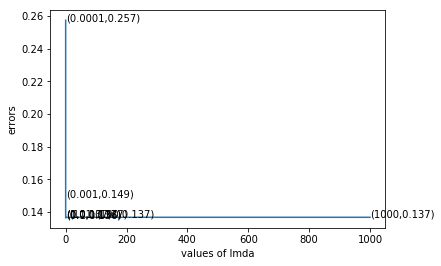

In [109]:
grid=GridSearchCV(LogisticRegression(),param_grid,scoring="roc_auc")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

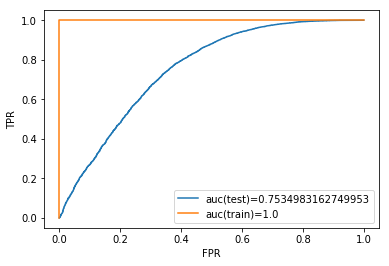

In [14]:
clf=LogisticRegression(C=0.1)
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# using randomized search

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891571428571429


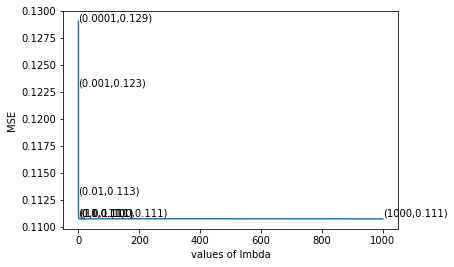

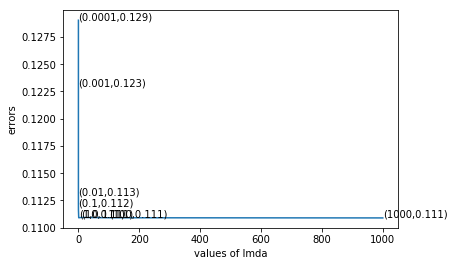

In [110]:
#using f1 score
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891571428571429


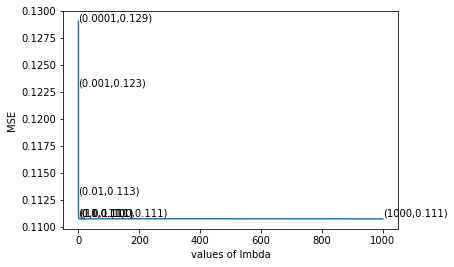

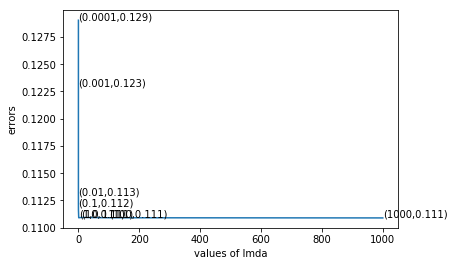

In [111]:
#using precision score
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8647329190946094


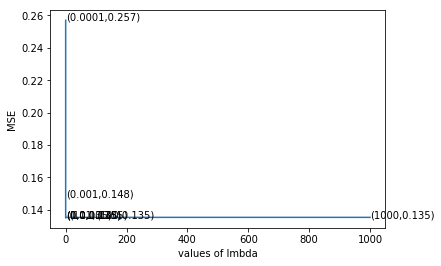

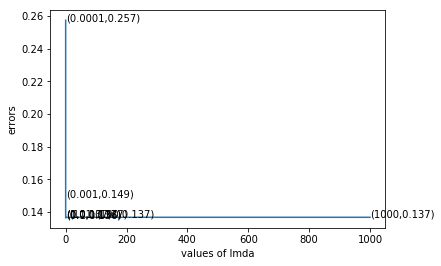

In [112]:
grid=RandomizedSearchCV(LogisticRegression(),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

# L1 REGULARIZATION

## gridsearchcv

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891285714285714


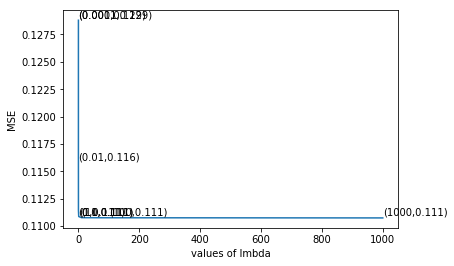

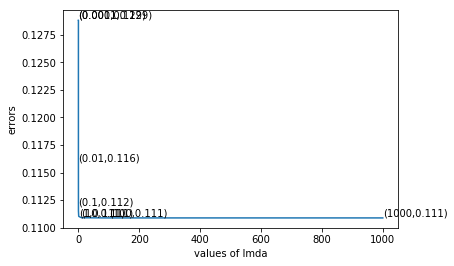

In [113]:
#using f1 score
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891


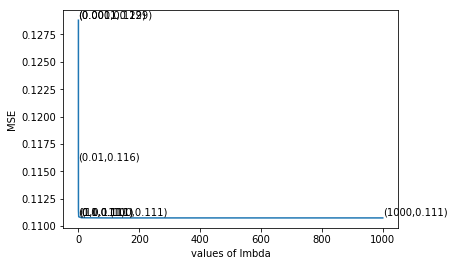

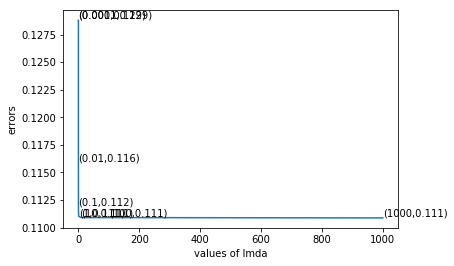

In [114]:
#using precision
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8647601619742057


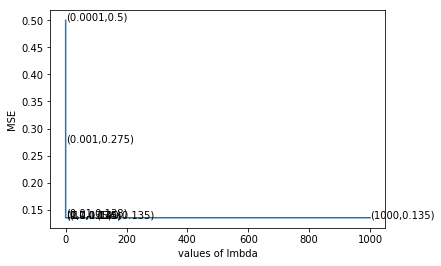

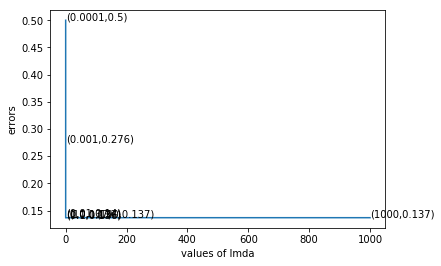

In [115]:
grid=GridSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc")
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## roc auc curve

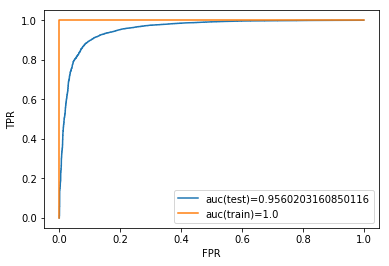

In [15]:
clf=LogisticRegression(C=0.1,penalty="l1")
clf.fit(X_train_dtm,lstTrain)

predTest=clf.predict(X_test_dtm)
predTrain=clf.predict(X_train_dtm)
#predprob
pred=clf.predict_proba(X_test_dtm)[:,1]
predProb=clf.predict_proba(X_train_dtm)[:,1]
#test
fpr,tpr,_= roc_curve(lsttest,pred)
auc=roc_auc_score(lsttest,pred)
plt.plot(fpr,tpr,label="auc(test)="+str(auc))
plt.legend(loc=4)
#train
fpr,tpr,_= roc_curve(lstTrain,predProb)
auc=roc_auc_score(lstTrain,predProb)
plt.plot(fpr,tpr,label="auc(train)="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# RandomizedSearch

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8891142857142857


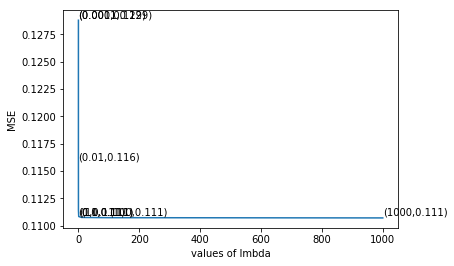

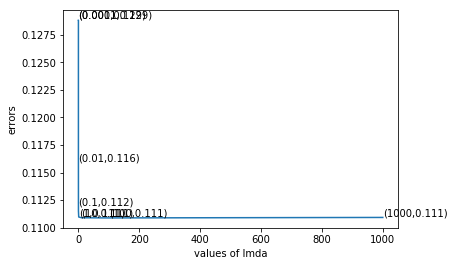

In [116]:
#using f1  score
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="f1_micro",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

best estimator is :
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8890714285714286


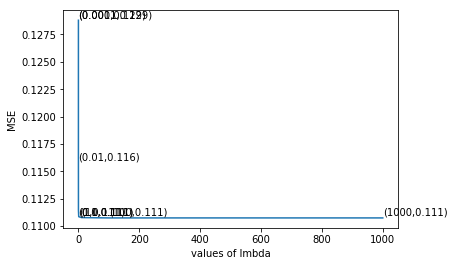

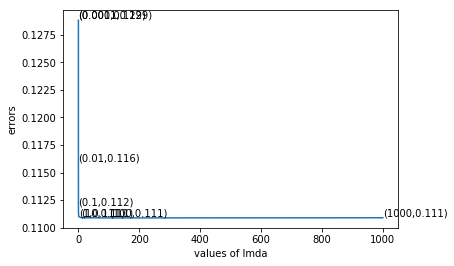

In [117]:
#using precision
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="precision_micro",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## using roc_auc

best estimator is :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score is :
0.8647616169647709


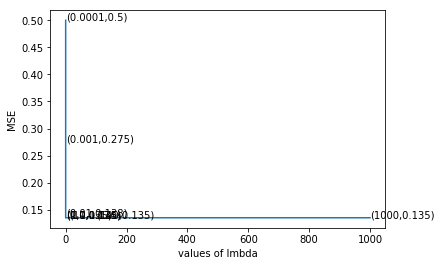

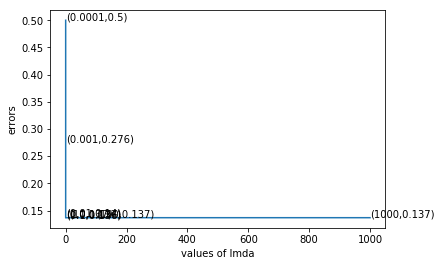

In [118]:
grid=RandomizedSearchCV(LogisticRegression(penalty="l1"),param_grid,scoring="roc_auc",n_iter=8)
grid.fit(sent_vec,lstTrain)
print("best estimator is :")
print(grid.best_estimator_)
print("best score is :")
print(grid.score(sent_vec,lstTrain))

df=grid.cv_results_
trainScore=df["mean_train_score"]
cvScore=df["mean_test_score"]

MSEf1Train=[1-x for x in trainScore]
MSEf1CV=[1-x for x in cvScore]

#plotting traing error
plt.plot(lmda,MSEf1Train)
for xy in zip(lmda,np.round(MSEf1Train,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmbda")
plt.ylabel("MSE")
plt.show()

#plotting cv error
plt.plot(lmda,MSEf1CV)
for xy in zip(lmda,np.round(MSEf1CV,3)):
    plt.annotate("(%s,%s)" % xy,xy=xy)
plt.xlabel("values of lmda")
plt.ylabel("errors")
plt.show()

## confusion metric for training data

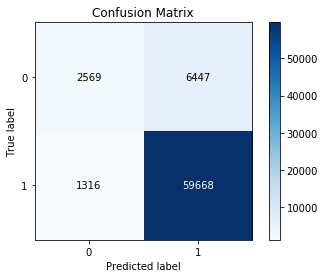

In [119]:
#training data
model=LogisticRegression(C=1)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec)
scikitplot.metrics.plot_confusion_matrix(lstTrain,pred)

## confusion metric for test data

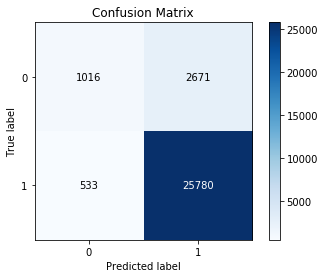

In [120]:
#test data
model=LogisticRegression(C=1)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
scikitplot.metrics.plot_confusion_matrix(lsttest,pred)

## checking the sparsity by increasing value of lmda

In [121]:
model=LogisticRegression(penalty="l1",C=1000)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 50


In [122]:
model=LogisticRegression(penalty="l1",C=100)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 50


In [123]:
model=LogisticRegression(penalty="l1",C=10)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 50


In [124]:
model=LogisticRegression(penalty="l1",C=1)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 50


In [125]:
model=LogisticRegression(penalty="l1",C=0.1)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 50


In [126]:
model=LogisticRegression(penalty="l1",C=0.01)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.89
f1score is 0.94
no. of nonzero ele are 40


In [127]:
model=LogisticRegression(penalty="l1",C=0.001)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.88
f1score is 0.93
no. of nonzero ele are 13


In [128]:
model=LogisticRegression(penalty="l1",C=0.0001)
model.fit(sent_vec,lstTrain)
pred=model.predict(sent_vec_test)
acc=accuracy_score(lsttest,pred)
f1=f1_score(lsttest,pred)
print("accuracy is {}".format(np.round(acc,2)))
print("f1score is {}".format(np.round(f1,2)))
x=model.coef_
print("no. of nonzero ele are {}".format(np.count_nonzero(x)))

accuracy is 0.88
f1score is 0.93
no. of nonzero ele are 0


# CONCLUSION

## BOW

In [129]:
from prettytable import PrettyTable
print("USING GRIDSEARCHCV L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "1.0",100])
x.add_row(["precision", ".879",100])
x.add_row(["roc_auc", "0.767",100])
print(x)
print("="*50)
print("USING RandomSearch L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.879",100])
x.add_row(["precision", ".879",100])
x.add_row(["roc_auc", "0.767",100])
print(x)
print("="*50)
print("USING GridSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.99",0.01])
x.add_row(["precision", ".99",0.01])
x.add_row(["roc_auc", "0.99",0.01])
print(x)
print("="*50)
print("USING RandomSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.94",0.01])
x.add_row(["precision", ".94",0.01])
x.add_row(["roc_auc", "0.96",0.01])
print(x)

USING GRIDSEARCHCV L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  1.0  |      100       |
| precision |  .879 |      100       |
|  roc_auc  | 0.767 |      100       |
+-----------+-------+----------------+
USING RandomSearch L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  | 0.879 |      100       |
| precision |  .879 |      100       |
|  roc_auc  | 0.767 |      100       |
+-----------+-------+----------------+
USING GridSearch L1 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.99 |      0.01      |
| precision |  .99  |      0.01      |
|  roc_auc  |  0.99 |      0.01      |
+-----------+-------+----------------+
USING RandomSearch L1 REGULARIZATION
+-----------+-------+--------------

### CONFUSION METRICS

training data:
model could predict 99% negative reiviews and 100% positive reviews

test data:
model could predict 59% negative reviews and 98% positive reviews

## TFIDF

In [130]:
print("USING GRIDSEARCHCV L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.99",.001])
x.add_row(["precision", ".99",.001])
x.add_row(["roc_auc", "0.99",.0001])
print(x)
print("="*50)
print("USING RandomSearch L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.99",0.001])
x.add_row(["precision", ".99",0.001])
x.add_row(["roc_auc", "0.99",0.0001])
print(x)
print("="*50)
print("USING GridSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.96",0.01])
x.add_row(["precision", ".96",0.01])
x.add_row(["roc_auc", "0.98",0.01])
print(x)
print("="*50)
print("USING RandomSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.96",0.01])
x.add_row(["precision", ".99",0.001])
x.add_row(["roc_auc", "0.99",0.0001])
print(x)

USING GRIDSEARCHCV L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.99 |     0.001      |
| precision |  .99  |     0.001      |
|  roc_auc  |  0.99 |     0.0001     |
+-----------+-------+----------------+
USING RandomSearch L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.99 |     0.001      |
| precision |  .99  |     0.001      |
|  roc_auc  |  0.99 |     0.0001     |
+-----------+-------+----------------+
USING GridSearch L1 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.96 |      0.01      |
| precision |  .96  |      0.01      |
|  roc_auc  |  0.98 |      0.01      |
+-----------+-------+----------------+
USING RandomSearch L1 REGULARIZATION
+-----------+-------+--------------

## confusion metrics

training data:
model could predict 99% negative reviews and 100% positive reviews

test data:
model could predict 67% negative reviews and 96% positive reviews

## WORD 2 VECTOR

In [131]:
print("USING GRIDSEARCHCV L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", ".89",1000])
x.add_row(["roc_auc", "0.88",0.01])
print(x)
print("="*50)
print("USING RandomSearch L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", "0.89",1000])
x.add_row(["roc_auc", "1.0",1000])
print(x)
print("="*50)
print("USING GridSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", ".89",100])
x.add_row(["roc_auc", "0.89",1000])
print(x)
print("="*50)
print("USING RandomSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", ".89",100])
x.add_row(["roc_auc", "0.89",1])
print(x)

USING GRIDSEARCHCV L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      1000      |
| precision |  .89  |      1000      |
|  roc_auc  |  0.88 |      0.01      |
+-----------+-------+----------------+
USING RandomSearch L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      1000      |
| precision |  0.89 |      1000      |
|  roc_auc  |  1.0  |      1000      |
+-----------+-------+----------------+
USING GridSearch L1 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      1000      |
| precision |  .89  |      100       |
|  roc_auc  |  0.89 |      1000      |
+-----------+-------+----------------+
USING RandomSearch L1 REGULARIZATION
+-----------+-------+--------------

## confusion metric

training data:
model is able to predict 97% positive reviews and 36 % negative reviews

test data:
model is able to predict 96% positive reviews and 13% negative reviews

## TFIDF WEIGHTED WORD 2 VECTOR

In [132]:
print("USING GRIDSEARCHCV L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", ".89",1000])
x.add_row(["roc_auc", "0.86",.1])
print(x)
print("="*50)
print("USING RandomSearch L2 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",1000])
x.add_row(["precision", ".89",1000])
x.add_row(["roc_auc", "0.86",0.1])
print(x)
print("="*50)
print("USING GridSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",100])
x.add_row(["precision", ".89",100])
x.add_row(["roc_auc", "0.86",1])
print(x)
print("="*50)
print("USING RandomSearch L1 REGULARIZATION")
x = PrettyTable()
x.field_names = ["metrics","Score", "hyperparameter"]
x.add_row(["f1Score", "0.89",100])
x.add_row(["precision", ".89",100])
x.add_row(["roc_auc", "0.86",1])
print(x)

USING GRIDSEARCHCV L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      1000      |
| precision |  .89  |      1000      |
|  roc_auc  |  0.86 |      0.1       |
+-----------+-------+----------------+
USING RandomSearch L2 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      1000      |
| precision |  .89  |      1000      |
|  roc_auc  |  0.86 |      0.1       |
+-----------+-------+----------------+
USING GridSearch L1 REGULARIZATION
+-----------+-------+----------------+
|  metrics  | Score | hyperparameter |
+-----------+-------+----------------+
|  f1Score  |  0.89 |      100       |
| precision |  .89  |      100       |
|  roc_auc  |  0.86 |       1        |
+-----------+-------+----------------+
USING RandomSearch L1 REGULARIZATION
+-----------+-------+--------------

## confusion metrics

training data:
model is able to predict 97% positive reviews and 27 % negative reviews

test data:
model is able to predict 96% positive reviews and 13% negative reviews